<a href="https://colab.research.google.com/github/P2GONE/AI/blob/main/Regression_California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()      # 캘리포니아 집값데이터 불러오기
print(california.keys())                     # 딕셔너리 형태로 구성됨

print('feature_names:', california['feature_names']) # 속성들의 열이름 출력
print('target_names:', california['target_names'])   # 가격의 열이름 출력
print('DESCR:', california['DESCR'])               # 데이터 설명 출력

print('data shape:', california['data'].shape)       # 입력 데이터의 형태 출력
print('target shape:', california['target'].shape)   # 타깃 데이터의 형태 출력

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target_names: ['MedHouseVal']
DESCR: .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/

In [18]:
import pandas as pd
df = pd.DataFrame(california.data, columns=california.feature_names)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [19]:
df.shape

(20640, 9)

In [72]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


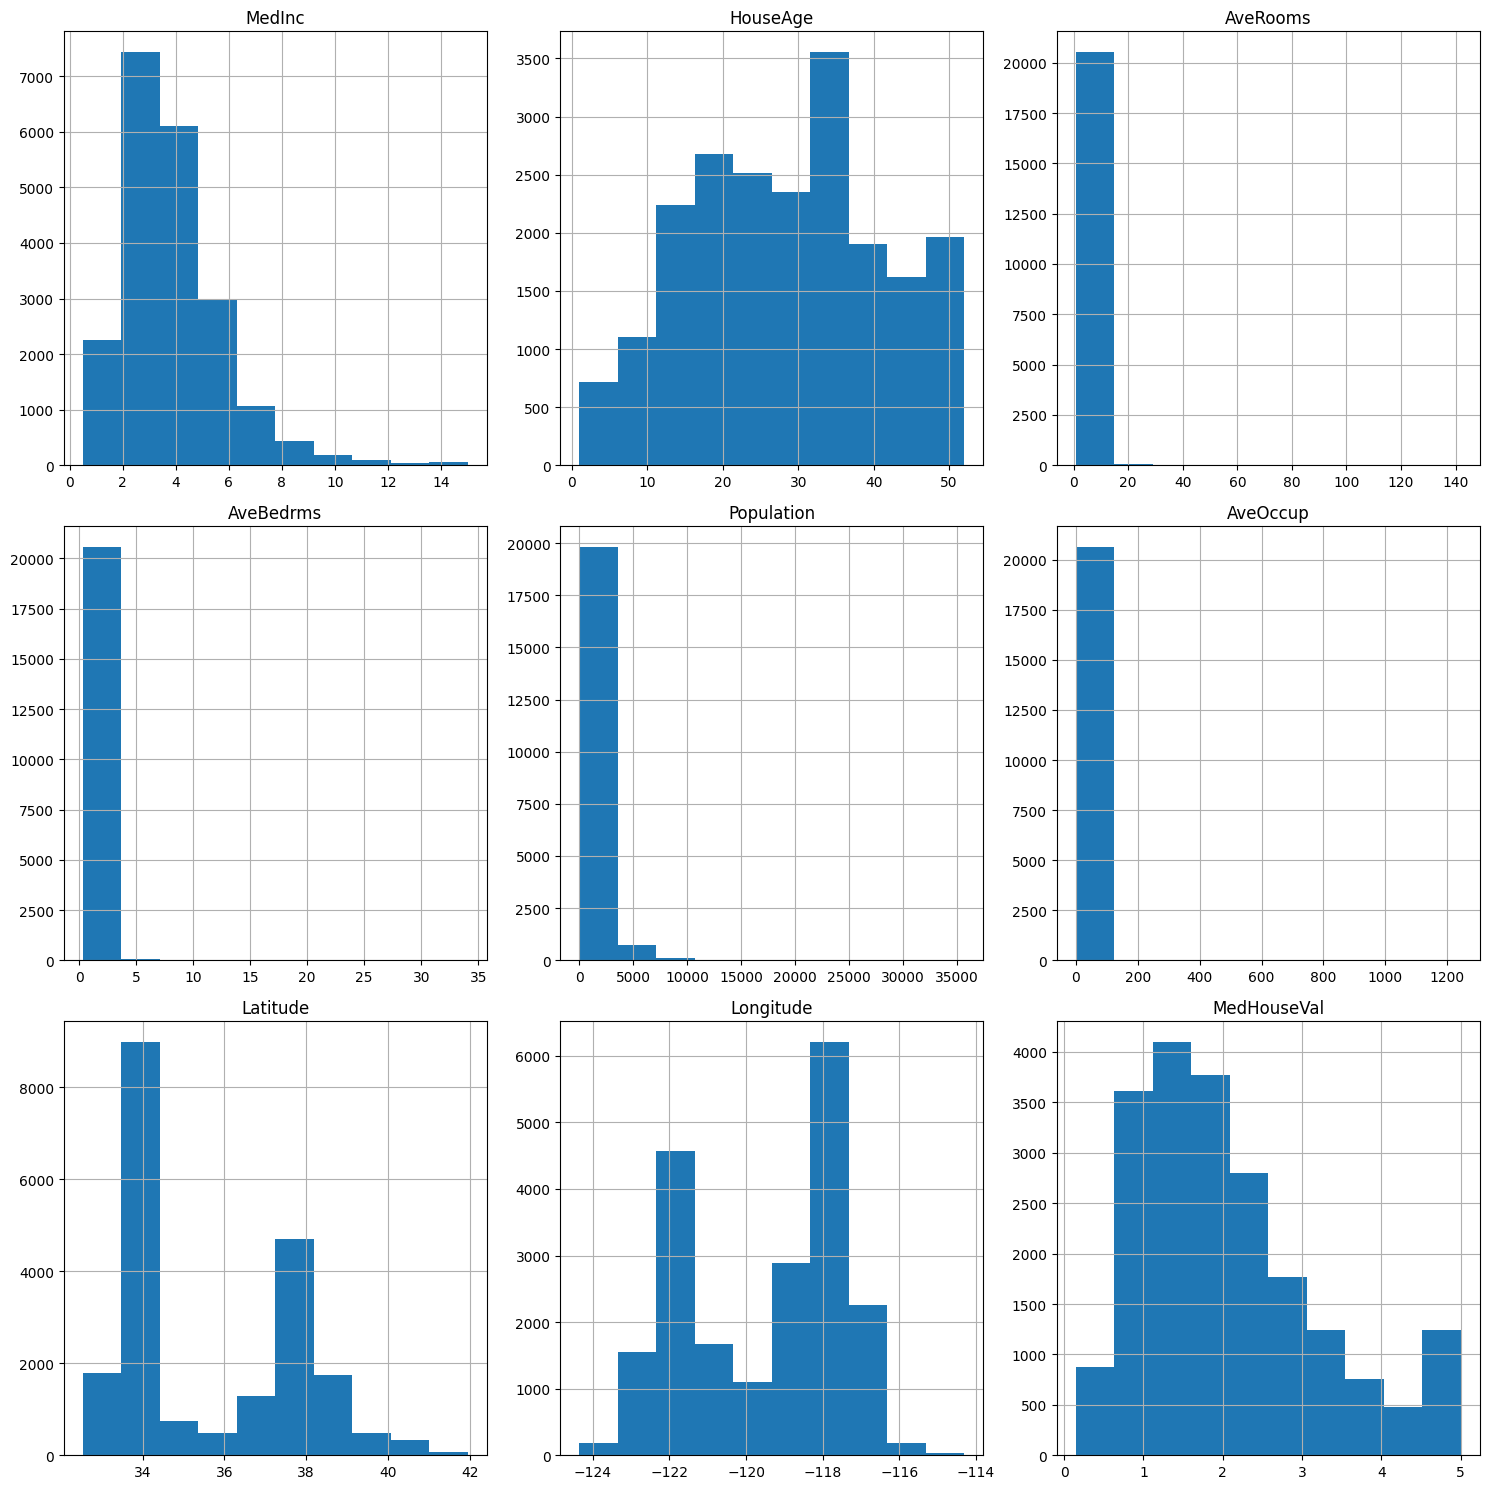

In [74]:
import matplotlib.pyplot as plt

# Generate histograms for all columns in the DataFrame
df.hist(figsize=(15, 15))
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

<Axes: >

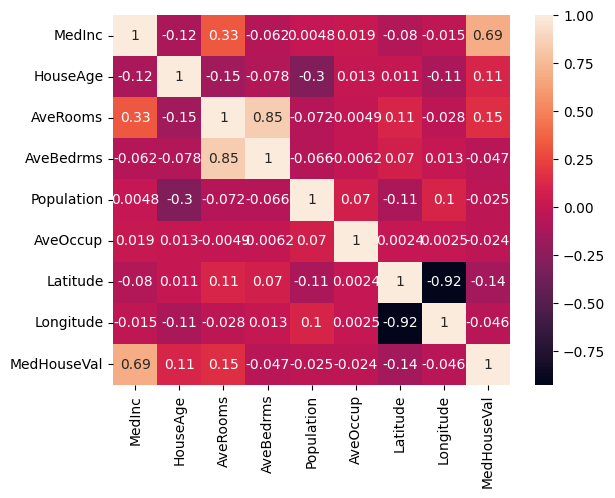

In [75]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [49]:
"""
About Dataset
캘리포니아 주택 데이터셋은 캘리포니아 주의 주택 가격과 관련된 다양한 정보를 포함한 데이터셋입니다. 이 데이터셋은 주로 머신러닝 모델을 훈련시키기 위해 사용되며, 특히 주택 가격 예측 모델에 자주 활용됩니다.

MedInc (Median Income): 중간 소득을 나타내며, 단위는 10,000달러입니다.
HouseAge (House Age): 주택의 나이를 나타내며, 단위는 연도입니다.
AveRooms (Average Rooms): 평균 방 개수를 나타냅니다.
AveBedrms (Average Bedrooms): 평균 침실 개수를 나타냅니다.
Population: 각 구역의 인구 수를 나타냅니다.
AveOccup (Average Occupancy): 가구당 평균 거주자 수를 나타냅니다.
Latitude: 각 구역의 위도를 나타냅니다.
Longitude: 각 구역의 경도를 나타냅니다.
MedHouseVal (Median House Value): 중간 주택 가치를 나타내며, 단위는 10,000달러입니다.
이 데이터셋은 캘리포니아 주의 다양한 구역을 포괄하며, 주택 시장 분석 및 예측을 위해 유용한 정보를 제공합니다. 데이터를 분석하면 지역별 주택 가격 차이, 소득 수준과 주택 가격 간의 관계, 주택 연령과 가격 간의 관계 등을 파악할 수 있습니다. 이는 부동산 시장 연구, 정책 결정, 경제학 연구 등에 널리 활용됩니다.
"""

'\nAbout Dataset\n캘리포니아 주택 데이터셋은 캘리포니아 주의 주택 가격과 관련된 다양한 정보를 포함한 데이터셋입니다. 이 데이터셋은 주로 머신러닝 모델을 훈련시키기 위해 사용되며, 특히 주택 가격 예측 모델에 자주 활용됩니다.\n\nMedInc (Median Income): 중간 소득을 나타내며, 단위는 10,000달러입니다.\nHouseAge (House Age): 주택의 나이를 나타내며, 단위는 연도입니다.\nAveRooms (Average Rooms): 평균 방 개수를 나타냅니다.\nAveBedrms (Average Bedrooms): 평균 침실 개수를 나타냅니다.\nPopulation: 각 구역의 인구 수를 나타냅니다.\nAveOccup (Average Occupancy): 가구당 평균 거주자 수를 나타냅니다.\nLatitude: 각 구역의 위도를 나타냅니다.\nLongitude: 각 구역의 경도를 나타냅니다.\nMedHouseVal (Median House Value): 중간 주택 가치를 나타내며, 단위는 10,000달러입니다.\n이 데이터셋은 캘리포니아 주의 다양한 구역을 포괄하며, 주택 시장 분석 및 예측을 위해 유용한 정보를 제공합니다. 데이터를 분석하면 지역별 주택 가격 차이, 소득 수준과 주택 가격 간의 관계, 주택 연령과 가격 간의 관계 등을 파악할 수 있습니다. 이는 부동산 시장 연구, 정책 결정, 경제학 연구 등에 널리 활용됩니다.\n'

In [95]:
from sklearn.model_selection import train_test_split

'''
집값을 높이는데 영향을 주는 속성 1, 2, 3위
1위 : MedInc
2위 : AveRooms
3위 : Latitude
'''

X = df[['MedInc', 'AveRooms', 'Latitude']]
Y = df['MedHouseVal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (16512, 3)
Shape of X_test: (4128, 3)
Shape of Y_train: (16512,)
Shape of Y_test: (4128,)


In [96]:
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
}

In [97]:
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    print(model_name)
    print('Accuracy: ',model.score(X_test,Y_test))
    # Check if the model is Linear Regression and print coefficients
    if model_name == 'Linear Regression':
        print('Coefficients:', model.coef_)
    print('------------------------------------')

Linear Regression
Accuracy:  0.47025063735398676
Coefficients: [ 0.42995704 -0.0341419  -0.04380878]
------------------------------------


In [100]:
from sklearn.model_selection import train_test_split

'''
번외) 가장 낮은 두 값을 drop 후 학습한 결과
'''

X = df.drop(labels=['MedHouseVal','Latitude','Longitude'],axis=1)
Y = df['MedHouseVal']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [101]:
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    print(model_name)
    print('Accuracy: ',model.score(X_test,Y_test))
    # Check if the model is Linear Regression and print coefficients
    if model_name == 'Linear Regression':
        print('Coefficients:', model.coef_)
    print('------------------------------------')

Linear Regression
Accuracy:  0.5099337366296416
Coefficients: [ 5.46160779e-01  1.67879091e-02 -2.23919944e-01  1.11549261e+00
  2.31671974e-05 -4.61823135e-03]
------------------------------------
